In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [212]:
df = pd.read_csv("C:\\Users\\win10\\OneDrive\\Desktop\\loan_sanction_train.csv")

In [219]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1


In [214]:
cols = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Property_Area','Loan_Status']

df = pd.get_dummies(df,columns=cols,drop_first=True)
df = df.drop('Loan_ID',axis=1)

In [215]:
df.dropna(inplace=True)

In [216]:
df['Dependents'] = df['Dependents'].replace(['3+'],['3'])

In [217]:
X = df.drop('Loan_Status_Y',axis=1)
y = df['Loan_Status_Y']

<AxesSubplot: >

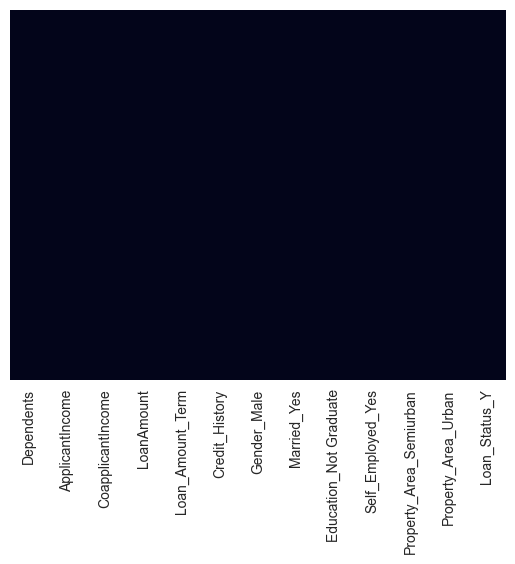

In [218]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot: xlabel='LoanAmount', ylabel='ApplicantIncome'>

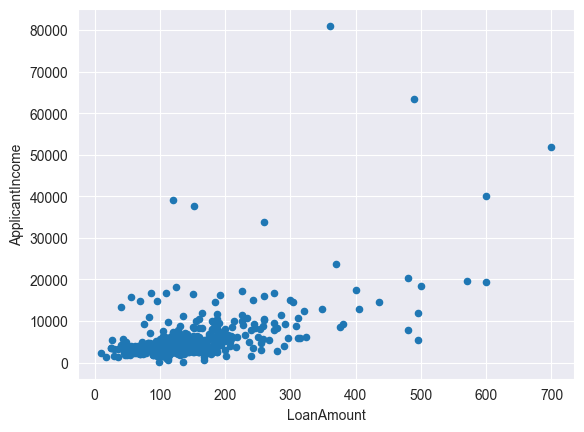

In [189]:
df.plot.scatter(x='LoanAmount',y='ApplicantIncome',)

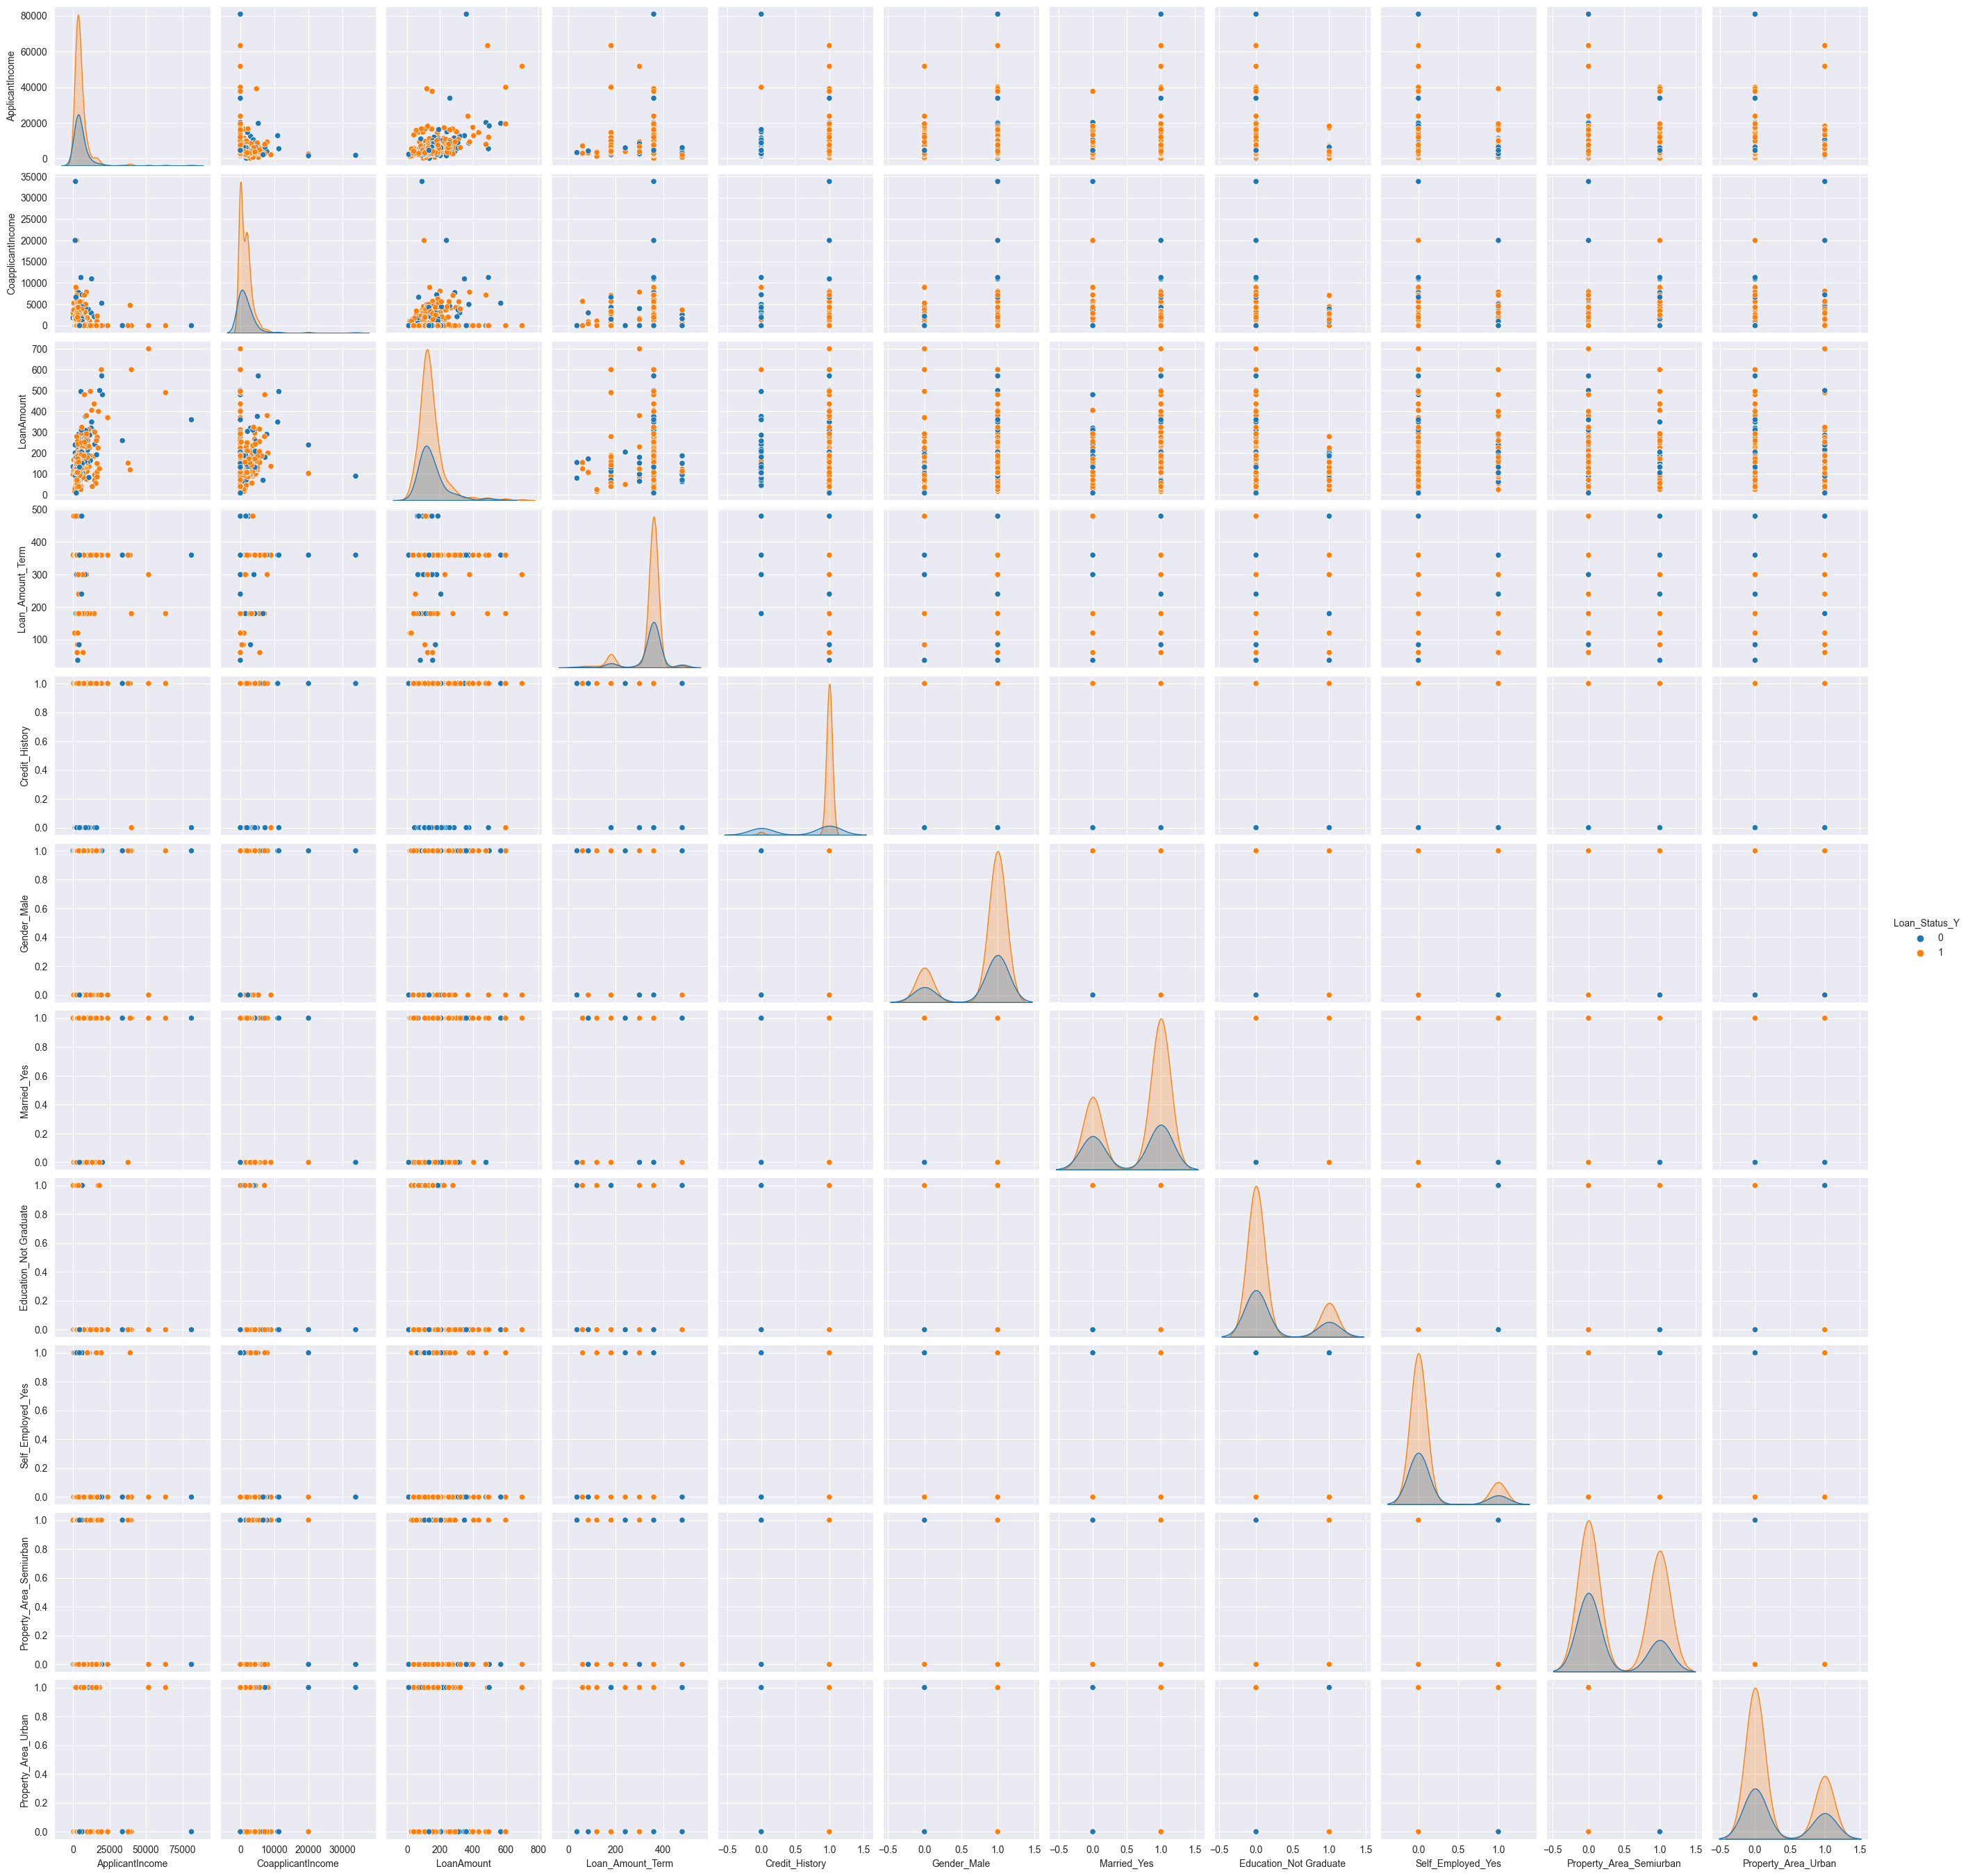

In [191]:
sns.pairplot(df,hue='Loan_Status_Y')

In [208]:
data = pd.read_csv('C:\\Users\\win10\\OneDrive\\Desktop\\loan_sanction_test.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


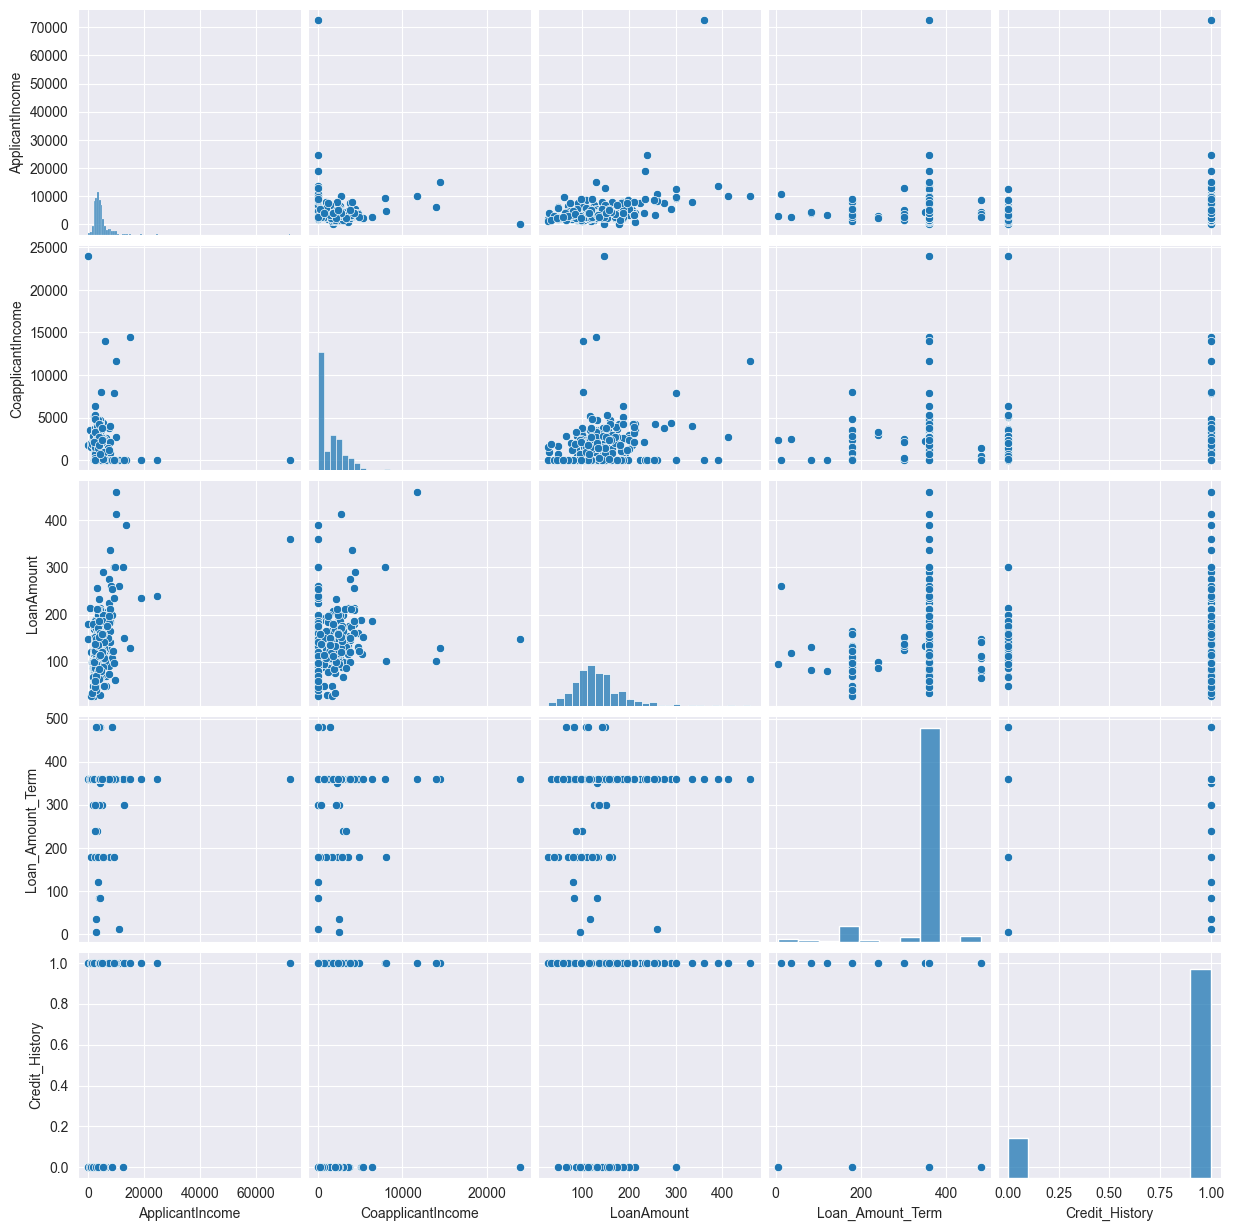

In [207]:
sns.pairplot(data)

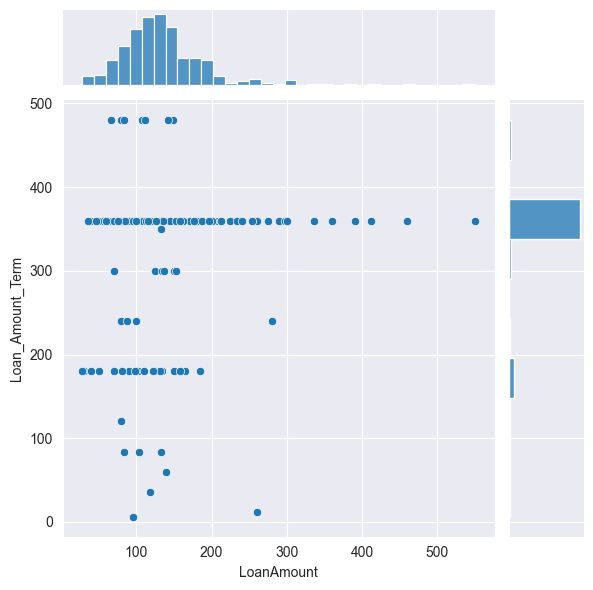

In [210]:
sns.jointplot(x='LoanAmount',y='Loan_Amount_Term',data = data)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
model = LogisticRegression()

In [236]:
model.fit(x_train,y_train)

C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [227]:
predictions = model_svm.predict(x_test)

In [228]:
from sklearn.metrics import classification_report

In [229]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.68      1.00      0.81       106

    accuracy                           0.68       156
   macro avg       0.34      0.50      0.40       156
weighted avg       0.46      0.68      0.55       156



C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,